# Final Project - Maintaining EV customers

---------------
## Context
---------------
This dataset presents results from a survey of FCV and BEV and compared the sociodeographic profile of FCV buyers vs BEV Households.  


-----------------
## Objective
-----------------
Based on the data we want to identify Current FCV & BEV Owners Demographics and see if there are any major differences between the two car owners.  

For our ML model we will attempt to predict based on the information if we can identify the customer as a FCV or BEV owner.  

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:
- When the customer submitted their data
- If they Previously Owned a PHEV, BEV, HEV, CNG
- Household Income
- Importance of Reducing Greenhouse Emissions
- Demographics of the customer current car (year, manufacture, model)
- Demographics on the customer's (home type, ownership of home,  education, gender, age, # of people in household)
- Demographics on customers car usage (longest trip, number of trips over 200 miles, one way commute distance, annual VMT vehicle miles traveled)
- If the customer is currently a FCV or BEV Current Owner


#### Acronyms used
- BEV: Battery Electric Vehicle
- FCV: Fuel Cell Vehicle (Hydrogen fuel cell vehicle)
- PHEV: Plug-in hybrid electric vehicle
- CNG: Compressed Natural Gas (everyday car)

### Import the necessary libraries or dependencies

In [159]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Read the Dataset 

In [141]:
#Import File
fcv_df = pd.read_excel('FCV&EVMT Data_6.18.19.xlsx')

## Descriptive Analysis/EDA

1. Check dimensions of the dataframe in terms of rows and columns
2. Check data types. Ensure your data types are correct. Refer data definitions to validate
3. If data types are not as per business definition, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Detect outliers

### Examine Dataset 

In [142]:
fcv_df.head()

,id. Response ID,submitdate. Date submitted,Month Year[subm...Date submitted],Month[Month Yea...ate submitted]],Year[Month Year...ate submitted]],lastpage. Last page,Carmain,Previous PHEVs,Previous BEVs,Previous HEVs,...,Highest Level of Education,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy"
0,FCV_1_3,2017/06/02 11:30:57,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,1.0,0.0,0.0,...,3.0,483.14,0.0,0.01,2.0,65.0,0.0,2,14622.000000,0.0
1,FCV_1_4,2017/06/02 11:15:39,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,0.0,0.0,1.0,...,4.0,568.09,1.0,10.69,3.0,65.0,0.0,3,9197.142857,0.0
2,FCV_1_2,2017/06/02 10:51:59,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,1.0,1.0,0.0,...,4.0,398.57,0.0,9.39,5.0,55.0,1.0,4,15360.000000,0.0
3,FCV_1_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,FCV_1_15,2017/06/02 19:35:59,06/2017,6.0,2017.0,42.0,2017 Toyota Mirai,1.0,0.0,0.0,...,2.0,255.16,0.0,17.63,2.0,55.0,0.0,3,5082.352941,0.0


### The dimension of the `data` dataframe. (shape, r x c)

#### Observations: 


In [143]:
fcv_df.shape

(27021, 25)

### Data Types/Categorical vs. Numerical Columns

In [144]:
fcv_df.dtypes

id. Response ID                                                                     object
submitdate. Date submitted                                                          object
Month Year[subm...Date submitted]                                                   object
Month[Month Yea...ate submitted]]                                                  float64
Year[Month Year...ate submitted]]                                                  float64
lastpage. Last page                                                                float64
Carmain                                                                             object
Previous PHEVs                                                                     float64
Previous BEVs                                                                      float64
Previous HEVs                                                                      float64
Previous CNGs                                                                      float64

#### Observations:

### Missing Values

**If we encounter with missing data, what we can do:**

* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

Mode Inputation
* Mode imputation means replacing missing values by the mode, or the most frequent- category value.


In [145]:
fcv_df.isnull().sum()

id. Response ID                                                                        0
submitdate. Date submitted                                                          6939
Month Year[subm...Date submitted]                                                   6939
Month[Month Yea...ate submitted]]                                                   6939
Year[Month Year...ate submitted]]                                                   6939
lastpage. Last page                                                                  996
Carmain                                                                             1405
Previous PHEVs                                                                     11077
Previous BEVs                                                                      11077
Previous HEVs                                                                      11077
Previous CNGs                                                                      11077
Household Income     

#### Observations: 

### Summary Statistics

In [146]:
fcv_df.describe()

,Month[Month Yea...ate submitted]],Year[Month Year...ate submitted]],lastpage. Last page,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),...,Highest Level of Education,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy"
count,20082.000000,20082.000000,26025.000000,15944.000000,15944.000000,15944.000000,15944.000000,16964.000000,18502.000000,18944.000000,...,19017.000000,12620.000000,1.518500e+04,19536.000000,21834.000000,21603.000000,21567.000000,27021.000000,1.882500e+04,14044.000000
mean,7.227169,2016.549995,37.354621,0.114714,0.128638,0.235575,0.004328,191924.074511,1.701342,0.845703,...,3.336909,373.786568,1.478094e+06,19.484645,2.846341,50.044994,0.263644,2.191074,1.298698e+04,0.934420
std,2.182451,1.142510,13.540183,0.318686,0.334809,0.424371,0.065644,109658.500036,1.638336,0.361243,...,0.701598,358.396789,1.803439e+08,44.501239,1.253612,13.427983,0.440618,1.013026,2.773889e+04,0.247555
min,4.000000,2015.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,-3.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.000000,1.000000,18.000000,0.000000,1.000000,-2.400000e+05,0.000000
25%,5.000000,2015.000000,42.000000,0.000000,0.000000,0.000000,0.000000,125000.000000,1.160000,1.000000,...,3.000000,169.845000,0.000000e+00,6.320000,2.000000,35.000000,0.000000,1.000000,8.000000e+03,1.000000
50%,8.000000,2017.000000,43.000000,0.000000,0.000000,0.000000,0.000000,175000.000000,2.570000,1.000000,...,3.000000,313.885000,0.000000e+00,14.040000,3.000000,45.000000,0.000000,2.000000,1.122720e+04,1.000000
75%,9.000000,2018.000000,45.000000,0.000000,0.000000,0.000000,0.000000,225000.000000,2.770000,1.000000,...,4.000000,431.147500,3.000000e+00,24.620000,4.000000,55.000000,1.000000,3.000000,1.545247e+04,1.000000
max,12.000000,2018.000000,49.000000,1.000000,1.000000,1.000000,1.000000,500000.000000,3.000000,1.000000,...,4.000000,4865.700000,2.222222e+10,2449.170000,13.000000,80.000000,1.000000,5.000000,3.000000e+06,1.000000


In [147]:
# Update Column Names
fcv_df = fcv_df.rename(columns={'submitdate. Date submitted': 'Date Submitted',
                                'Month Year[subm...Date submitted]':'Month/Year Submitted',
                                'Month[Month Yea...ate submitted]]': 'Month Submitted',
                                'Year[Month Year...ate submitted]]':'Year Submitted'})

In [148]:
#Split Carmain into separate columns
fcv_df[['Model Year', 'Manufacturer', 'Model']] = fcv_df['Carmain'].str.split(' ', n=2, expand=True)

#Drop Carmain, & ID as not longer needed
fcv_df = fcv_df.drop(columns=['Carmain','id. Response ID', 'Month/Year Submitted', 'lastpage. Last page'],axis=1)

In [149]:
# Viewing the first row of the dataframe
fcv_df.head(1)

,Date Submitted,Month Submitted,Year Submitted,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),...,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy",Model Year,Manufacturer,Model
0,2017/06/02 11:30:57,6.0,2017.0,1.0,0.0,0.0,0.0,275000.0,2.52,1.0,...,0.01,2.0,65.0,0.0,2,14622.0,0.0,2016,Toyota,Mirai


### Dropping null values

In [150]:
fcv_df = fcv_df.dropna()

### Converting the columns into the appropriate datatypes

In [151]:
# Viewing the original datatypes of the columns
fcv_df.dtypes

Date Submitted                                                                      object
Month Submitted                                                                    float64
Year Submitted                                                                     float64
Previous PHEVs                                                                     float64
Previous BEVs                                                                      float64
Previous HEVs                                                                      float64
Previous CNGs                                                                      float64
Household Income                                                                   float64
Importance of reducing greenhouse gas emissions (-3 not important, 3 important)    float64
Home ownership (own 1)                                                             float64
Home Type (detached 1)                                                             float64

In [152]:
# Changing the datatypes
fcv_df['Date Submitted'] = pd.to_datetime(fcv_df['Date Submitted'])

fcv_df[['Age', 
        'Gender (Male 1)', 
        'Home ownership (own 1)', 
        'Home Type (detached 1)',
        'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
        'Previous PHEVs', 
        'Previous BEVs', 
        'Previous HEVs', 
        'Previous CNGs',
        'Month Submitted', 
        'Year Submitted', 
        'Number of people in the household', 
        'Highest Level of Education',
        'Number of trips over 200 miles in the last 12 months']] = fcv_df[['Age', 
                                                                           'Gender (Male 1)', 
                                                                            'Home ownership (own 1)', 
                                                                            'Home Type (detached 1)',
                                                                            'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
                                                                            'Previous PHEVs', 
                                                                            'Previous BEVs', 
                                                                            'Previous HEVs', 
                                                                            'Previous CNGs',
                                                                            'Month Submitted', 
                                                                            'Year Submitted', 
                                                                            'Number of people in the household', 
                                                                            'Highest Level of Education',
                                                                            'Number of trips over 200 miles in the last 12 months']].astype(int) 


In [153]:
# Viewing the new datatypes
fcv_df.dtypes

Date Submitted                                                                     datetime64[ns]
Month Submitted                                                                             int32
Year Submitted                                                                              int32
Previous PHEVs                                                                              int32
Previous BEVs                                                                               int32
Previous HEVs                                                                               int32
Previous CNGs                                                                               int32
Household Income                                                                          float64
Importance of reducing greenhouse gas emissions (-3 not important, 3 important)             int32
Home ownership (own 1)                                                                      int32
Home Type (detached 

In [154]:
# Viewing the dataframe
fcv_df.head()

,Date Submitted,Month Submitted,Year Submitted,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),...,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy",Model Year,Manufacturer,Model
0,2017-06-02 11:30:57,6,2017,1,0,0,0,275000.0,2,1,...,0.01,2,65,0,2,14622.000000,0.0,2016,Toyota,Mirai
1,2017-06-02 11:15:39,6,2017,0,0,1,0,275000.0,2,1,...,10.69,3,65,0,3,9197.142857,0.0,2016,Toyota,Mirai
4,2017-06-02 19:35:59,6,2017,1,0,0,0,125000.0,2,1,...,17.63,2,55,0,3,5082.352941,0.0,2017,Toyota,Mirai
5,2017-06-06 12:11:14,6,2017,0,0,1,0,175000.0,1,1,...,3.53,2,75,0,2,13025.454545,0.0,2016,Toyota,Mirai
7,2017-06-02 15:57:08,6,2017,0,0,1,0,500000.0,1,1,...,28.05,3,45,0,3,18000.000000,0.0,2016,Toyota,Mirai


## Viewing Age vs. Previous PHEVs (two different visualizations)

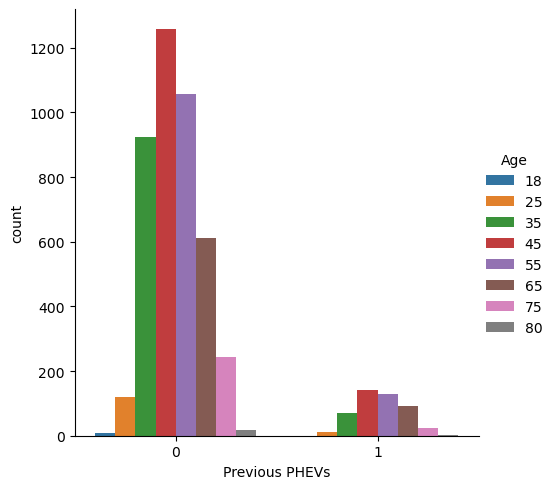

In [160]:
sns.catplot(x = 'Previous PHEVs', hue = 'Age', data = fcv_df, kind = 'count')

<AxesSubplot:xlabel='Age'>

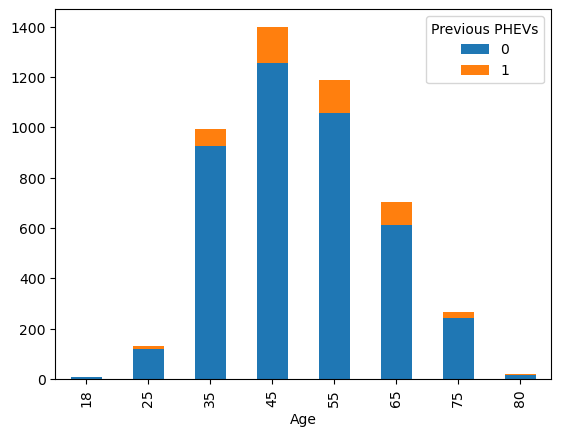

In [161]:
pd.crosstab(fcv_df['Age'], fcv_df['Previous PHEVs']).plot.bar(stacked = True)

### Check for Max and Min Values

#### Observation:


### Examine the mean, median, and mode. Are the three measures of central tendency equal?
-- this will help describe the skewness/distribution of attributes

#### Observations: 

### Pairplot for the variables. 

In [12]:
#sns.pairplot(data = pima, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')


#### Observations: 

### Scatterplots 

In [13]:
#plt.scatter(x = 'Glucose', y = 'Insulin', data = pima)
#plt.show()

#### Observations:

### Boxplots for Variables
Check the distribution and outliers for each column in the data.**

In [14]:
#plt.boxplot(pima['Age'])
#plt.title('Boxplot of Age')
#plt.ylabel('Age')
#plt.show()

#### Observations:


### Histograms

In [15]:
#plt.hist(pima[pima['Outcome'] == 1]['Age'], bins = 5)
#plt.title('Distribution of Age for Women who has Diabetes')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.show()

#### Observations:

### The interquartile range of all the variables

In [16]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

#### Observations: 

## Export of File to CSV for database

In [17]:
fcv_df.to_csv('Exports/FCV_Dataset.csv')

### Visualize the Correlation Matrix.

* Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates
* the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable
* increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations.
* correlation Correlation is a mutual relationship or connection between two or more things. It takes a value between (+1) and (-1)
* The correlation between two independent events is zero, two events with zero correlations may not be independent.

In [18]:
#plt.figure(figsize = (8, 8))
#sns.heatmap(corr_matrix, annot = True)

# Display the plot
#plt.show()

#### Observations: 


## Data Preprocessing for Modeling

* Renaming Columns
* Scaling/Normalizing
* Dropping unnecessary columns
* Hot encoding
* Imputing missing values with mode/median for columns
* Converting data types
* Format data types
* Apply get_dummies on the dataframe data

## Predictive Analysis/Building Models

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

## **Actionable Insights and Business Recommendations**